## Imports

In [8]:
import pandas as pd
import openai

In [17]:
from youtube_transcript_api import YouTubeTranscriptApi
from youtube_transcript_api.formatters import TextFormatter

In [9]:
from wordcloud import WordCloud
import numpy as np
import matplotlib.pyplot as plt
import itertools
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

## Data

Loading data from csv files. Titles has contains user-voted on titles that have been voted on. Info contains raw data from the videos, including the posted title on youtube. It contains over 7 million entries. Titles only has 145,000 entries so I'll left merge to only keep the entries that have the voted on titles.

In [3]:
titles = pd.read_csv('/Volumes/Samsung_T5/sb-mirror/titles.csv')
info = pd.read_csv('/Volumes/Samsung_T5/sb-mirror/videoInfo.csv')

In [4]:
info

,videoID,channelID,title,published
0,QyTRvbb3gkk,UCr7tNSNf7_aEEh5P-F5mE4A,Kronii Got Friendzoned by Chat but She End Up ...,1.634429e+09
1,qU1Yv58EXcc,UCo_IB5145EVNcf8hw1Kku7w,Game Theory: Minecraft's DARKEST Timeline! (He...,1.634429e+09
2,yKkVHBh9DQk,UCXJkLU1wZVqZjjVe1MuRj-A,TRIPLE RECORD EN GLOBILLOS? 🎈,1.633565e+09
3,7wCZSBOX7eM,UCg83RGdRpwfvoFEuE2zWKZA,Johnny vs. Nickelodeon All-Star Brawl (Sponsored),1.633392e+09
4,VVGjjaWWeRA,UCKBYXp4Xn2I2tL1UL4fpbhw,WOTB | NEW BIG HITTING JAGTIGER PREMIUM!,1.634429e+09
...,...,...,...,...
7380817,rx90BhnbJaM,UCFk00pDre4y0J1c7nYA2LnA,Is DealDash The Internets Biggest Scam?,0.000000e+00
7380818,L520xwhFGiI,UCglDIsg_Z9mE2oT9hsrbzFA,IELTS Speaking Practice Test with Answers,0.000000e+00
7380819,HIHsSWAnz8g,UCooTLkxcpnTNx6vfOovfBFA,Croatia vs. Italy Highlights | UEFA Euro 2024,0.000000e+00
7380820,lv1DxumGT8U,UCT6iAerLNE-0J1S_E97UAuQ,"I played Phantom Blade Zero, Replaced, Astro B...",0.000000e+00


In [5]:
titles

,videoID,title,original,userID,service,hashedVideoID,timeSubmitted,UUID
0,U0wTDK0VOeY,History of Antarctica's Flag,0,1ff2cdd11ed952d0c13d678413113860ff279a3d90d31c...,YouTube,93646c719490256e8cb43cfaa41e39534525389b0b28f5...,1680044079895,07f32a99-3e2d-48a3-a247-b2b03f7cd4bc
1,kdz6FeQLuHQ,Bad urbanism in the Bahamas,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,1dbe829d42168bdea3da01c29015072a3d79863c4b6aeb...,1680047863899,2803aa64-0759-4a28-8bf8-52499c9102ad
2,jN7mSXMruEo,"The Problems With Trucks and SUVs in Cities, a...",0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,b4ecd2e771e2e39068938450ee22decbf77b35fae52f2a...,1680047982458,96e6b40c-c858-4d80-af30-ce5e0584f40c
3,y6F6MolfV4Y,Original Title,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5...,1680053148721,b24401f5-e05b-42a2-a934-c27bd97d0690
4,y6F6MolfV4Y,YouTube Studio / Office Tour (early 2023),0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5...,1680053177069,41358c60-8006-41c0-8cde-c11a2e222fe4
...,...,...,...,...,...,...,...,...
202661,OllxOuryorc,Using Activated Perk with teammate,0,6778ed2bffd3ef91a4c02776391836008944e6ac5a593c...,YouTube,77017995151ea5cbce0d296ab2b08509de8130c3af9828...,1720471180426,ac08f5f5-58a2-4020-ac3b-81f17775b361
202662,wwrDAgtoND8,"Sudoku solve: counting circles, palindromes, b...",0,cdb60cd277cce6142e07ce07d919272e9964413514bc21...,YouTube,f532adae63e1e9815253ec11583adf65e297d8cca68023...,1720471238210,92e50c19-159d-4b26-964e-e886f4bad450
202663,hl5LgI3nOPg,Lost in the gutter | Rain World E34 (Blind),0,6653aafce754bdc5c5d5d2ad4f7ef05e9d7eb91e29f9b8...,YouTube,4e381960201cb9031e814f8f8a81424550d13c95dd6ff3...,1720471376434,51797ee6-3d52-4aca-b968-2f0e82a2baf9
202664,wwrDAgtoND8,"Sudoku solve: counting circles, palindromes, b...",0,cdb60cd277cce6142e07ce07d919272e9964413514bc21...,YouTube,f532adae63e1e9815253ec11583adf65e297d8cca68023...,1720471244723,d2156ba3-ae51-4db1-8aae-954214e2d9bb


I'm limiting the info dataframe to just the unique videoID and the title. Then I am renaming the "title" column in the titles dataframe for the merging process.

In [6]:
info_title = info[['videoID','title']]

In [7]:
titles.rename(columns={"title":"other_title"},inplace=True)

In [8]:
title_df = pd.merge(titles,info_title,how='left')

### Exploration

The original column seems to indicate that the video's title was not deemed "clickbaity" enough by the voters and was fine to remain. 

In [9]:
title_df[title_df['original']==1]

,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title
3,y6F6MolfV4Y,Original Title,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5...,1680053148721,b24401f5-e05b-42a2-a934-c27bd97d0690,YouTube Studio / Office Tour! (early 2023)
5,bUuGy5agBfg,Was Michael Jackson's hair catching fire in a ...,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,8e5bd4a8d212bea30ff1c3ca7c8540ed56db8cc10091ab...,1680053429196,1741ff0b-114f-4299-a921-9ed18bc42aef,Was Michael Jackson's hair catching fire durin...
6,_ZbUyS2IRMo,Using an Out-of-Control Car to Calculate π.,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,03feb8ae9418a9a4cbee7801a6eb067981d6fedef0fa58...,1680053572913,b1a18fa2-18e4-4ff3-aa37-c55c0a89aeb3,Using an Out-of-Control Car to Calculate π.
20,Kn56bMZ9OE8,Original Title,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,5748fca147063a17bbc3ad3d6b84e6c4091111eb0e3295...,1680062180565,169d6321-bab0-42bb-9054-7d97508f5288,A bus that transforms into a train
23,Kn56bMZ9OE8,This bus transforms into a train,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,5748fca147063a17bbc3ad3d6b84e6c4091111eb0e3295...,1680062566929,b6b6f220-a579-4972-9ccd-671a93ae06f0,A bus that transforms into a train
...,...,...,...,...,...,...,...,...,...
202620,8ywyCXOYlRc,[MV] Vib-Ribbon - Polaroid,1,94c3072d15e95da97f49644f65c5941de214596a219dfe...,YouTube,7de62b852ece18ed8b926d25fcdd255d50a5138575b86e...,1720467167602,60071e99-225f-4daf-ac28-16e5f0a08290,NaN
202625,xMx3x7CIdhY,I made a real V8 Engine in FL Studio (again).....,1,a54970cb23f33cda3175b33fe7ea539d7ea0fc9d4b9d1a...,YouTube,26b9418491c74bc9e00e2d39820b8bf90f6bb641e9497c...,1720467728558,6602c400-60b7-43c3-baec-f64e965c9c02,I made a real V8 Engine in FL Studio (again).....
202648,JFaC8ClJi1M,Spooky's jump scare mansion extra specimens ra...,1,caf7e6dbfe742473dc77406a79a3ea4269d0735276c1e7...,YouTube,779454572e98e26de46c6574fd3f4d24a4b76ab13f9f0d...,1720470161225,16b31a14-dc2e-4721-a727-5de9b6e3db68,Spooky's Jump Scare Mansion EXTRA Specimens Ra...
202650,8o6N8cIW8o8,World's largest water balloon🎈,1,e5cd985459a28ce2aeaa8b36f02f6126b13bfffacfe9da...,YouTube,ea9621d66b77d0889e72e18aa707031ddc03e9efcd8667...,1720470439638,5f6e4ae2-630f-4987-bdf6-647f8525cdbd,NaN


In [10]:
title_df['original'].value_counts(normalize=True)

0    0.942289
1    0.057711
Name: original, dtype: float64

Only 5 Percent of the dataset is "original title." 

In [11]:
title_df[title_df['original']==1]

,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title
3,y6F6MolfV4Y,Original Title,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5...,1680053148721,b24401f5-e05b-42a2-a934-c27bd97d0690,YouTube Studio / Office Tour! (early 2023)
5,bUuGy5agBfg,Was Michael Jackson's hair catching fire in a ...,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,8e5bd4a8d212bea30ff1c3ca7c8540ed56db8cc10091ab...,1680053429196,1741ff0b-114f-4299-a921-9ed18bc42aef,Was Michael Jackson's hair catching fire durin...
6,_ZbUyS2IRMo,Using an Out-of-Control Car to Calculate π.,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,03feb8ae9418a9a4cbee7801a6eb067981d6fedef0fa58...,1680053572913,b1a18fa2-18e4-4ff3-aa37-c55c0a89aeb3,Using an Out-of-Control Car to Calculate π.
20,Kn56bMZ9OE8,Original Title,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,5748fca147063a17bbc3ad3d6b84e6c4091111eb0e3295...,1680062180565,169d6321-bab0-42bb-9054-7d97508f5288,A bus that transforms into a train
23,Kn56bMZ9OE8,This bus transforms into a train,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,5748fca147063a17bbc3ad3d6b84e6c4091111eb0e3295...,1680062566929,b6b6f220-a579-4972-9ccd-671a93ae06f0,A bus that transforms into a train
...,...,...,...,...,...,...,...,...,...
202620,8ywyCXOYlRc,[MV] Vib-Ribbon - Polaroid,1,94c3072d15e95da97f49644f65c5941de214596a219dfe...,YouTube,7de62b852ece18ed8b926d25fcdd255d50a5138575b86e...,1720467167602,60071e99-225f-4daf-ac28-16e5f0a08290,NaN
202625,xMx3x7CIdhY,I made a real V8 Engine in FL Studio (again).....,1,a54970cb23f33cda3175b33fe7ea539d7ea0fc9d4b9d1a...,YouTube,26b9418491c74bc9e00e2d39820b8bf90f6bb641e9497c...,1720467728558,6602c400-60b7-43c3-baec-f64e965c9c02,I made a real V8 Engine in FL Studio (again).....
202648,JFaC8ClJi1M,Spooky's jump scare mansion extra specimens ra...,1,caf7e6dbfe742473dc77406a79a3ea4269d0735276c1e7...,YouTube,779454572e98e26de46c6574fd3f4d24a4b76ab13f9f0d...,1720470161225,16b31a14-dc2e-4721-a727-5de9b6e3db68,Spooky's Jump Scare Mansion EXTRA Specimens Ra...
202650,8o6N8cIW8o8,World's largest water balloon🎈,1,e5cd985459a28ce2aeaa8b36f02f6126b13bfffacfe9da...,YouTube,ea9621d66b77d0889e72e18aa707031ddc03e9efcd8667...,1720470439638,5f6e4ae2-630f-4987-bdf6-647f8525cdbd,NaN


In [12]:
title_df

,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title
0,U0wTDK0VOeY,History of Antarctica's Flag,0,1ff2cdd11ed952d0c13d678413113860ff279a3d90d31c...,YouTube,93646c719490256e8cb43cfaa41e39534525389b0b28f5...,1680044079895,07f32a99-3e2d-48a3-a247-b2b03f7cd4bc,The Coolest ''''Country'''' Flag You Need To Know
1,kdz6FeQLuHQ,Bad urbanism in the Bahamas,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,1dbe829d42168bdea3da01c29015072a3d79863c4b6aeb...,1680047863899,2803aa64-0759-4a28-8bf8-52499c9102ad,This Tiny Island has Insane Traffic
2,jN7mSXMruEo,"The Problems With Trucks and SUVs in Cities, a...",0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,b4ecd2e771e2e39068938450ee22decbf77b35fae52f2a...,1680047982458,96e6b40c-c858-4d80-af30-ce5e0584f40c,These Stupid Trucks are Literally Killing Us
3,y6F6MolfV4Y,Original Title,1,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5...,1680053148721,b24401f5-e05b-42a2-a934-c27bd97d0690,YouTube Studio / Office Tour! (early 2023)
4,y6F6MolfV4Y,YouTube Studio / Office Tour (early 2023),0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3...,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5...,1680053177069,41358c60-8006-41c0-8cde-c11a2e222fe4,YouTube Studio / Office Tour! (early 2023)
...,...,...,...,...,...,...,...,...,...
202661,OllxOuryorc,Using Activated Perk with teammate,0,6778ed2bffd3ef91a4c02776391836008944e6ac5a593c...,YouTube,77017995151ea5cbce0d296ab2b08509de8130c3af9828...,1720471180426,ac08f5f5-58a2-4020-ac3b-81f17775b361,NaN
202662,wwrDAgtoND8,"Sudoku solve: counting circles, palindromes, b...",0,cdb60cd277cce6142e07ce07d919272e9964413514bc21...,YouTube,f532adae63e1e9815253ec11583adf65e297d8cca68023...,1720471238210,92e50c19-159d-4b26-964e-e886f4bad450,NaN
202663,hl5LgI3nOPg,Lost in the gutter | Rain World E34 (Blind),0,6653aafce754bdc5c5d5d2ad4f7ef05e9d7eb91e29f9b8...,YouTube,4e381960201cb9031e814f8f8a81424550d13c95dd6ff3...,1720471376434,51797ee6-3d52-4aca-b968-2f0e82a2baf9,Lost in the Gutter | Rain World - Part 34 | Bl...
202664,wwrDAgtoND8,"Sudoku solve: counting circles, palindromes, b...",0,cdb60cd277cce6142e07ce07d919272e9964413514bc21...,YouTube,f532adae63e1e9815253ec11583adf65e297d8cca68023...,1720471244723,d2156ba3-ae51-4db1-8aae-954214e2d9bb,NaN


In [13]:
title_df['title'].isna().mean()*100

42.53599518419469

41% of the titles are nans, meaning I have to drop them from the dataset to really be able to guage the success of the chatgpt vs the models.

In [14]:
title_df.dropna(inplace=True)

In [16]:
title_df.sample(1)

,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title
10466,VD9obsm7Jgo,I played Wii,0,4bf3043b617d82738fcea641c8cd98b09badbcfd029bc4...,YouTube,76e042d482b679204e8a722392e55801d2d30320ebe4f1...,1688753542050,e6d04c43-fe97-40d1-b52d-a2e4834d8e27,i played wii party u until i beat expert diffi...


In [17]:
title_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116460 entries, 0 to 202663
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   videoID        116460 non-null  object
 1   other_title    116460 non-null  object
 2   original       116460 non-null  int64 
 3   userID         116460 non-null  object
 4   service        116460 non-null  object
 5   hashedVideoID  116460 non-null  object
 6   timeSubmitted  116460 non-null  int64 
 7   UUID           116460 non-null  object
 8   title          116460 non-null  object
dtypes: int64(2), object(7)
memory usage: 8.9+ MB


In [2]:
title_df.to_csv('titles_no_nan.csv')

NameError: name 'title_df' is not defined

### Working CSV Import

In [10]:
title_df = pd.read_csv('titles_no_nan.csv')

In [11]:
altered_titles = title_df[title_df['original']==0]

In [12]:
orginal_titles = title_df[title_df['original']==1]

In [13]:
pd.set_option('display.max_colwidth', None)

In [14]:
altered_titles[['other_title','title','videoID']]

,other_title,title,videoID
0,History of Antarctica's Flag,The Coolest ''''Country'''' Flag You Need To Know,U0wTDK0VOeY
1,Bad urbanism in the Bahamas,This Tiny Island has Insane Traffic,kdz6FeQLuHQ
2,"The Problems With Trucks and SUVs in Cities, and How It Got This Way",These Stupid Trucks are Literally Killing Us,jN7mSXMruEo
4,YouTube Studio / Office Tour (early 2023),YouTube Studio / Office Tour! (early 2023),y6F6MolfV4Y
7,Attempting to determine how a rolling unbalanced wheel behaves,The 56-Year Argument About a Hopping Hoop,ETRpkp03stQ
...,...,...,...
116453,How Knight Capital Group lost $440 million in 28 Minutes Due to 9 year old legacy code,"Dev Loses $440 Million in 28 minutes, Chaos Ensues",263CooDJZCY
116455,Stream announcement where viewers make a Minecraft world flat,I NEED YOU!,AR465lB2pOQ
116456,Interviewing Senator Warren (Before the first presidential Debate),I asked Senator Warren if the President is TOO OLD?,w9_3ZpjVYpg
116458,"Addressing My Previous Video on SSSniperwolf Striking a Channel, Where She Claims She Didn't Issue the Strike",SSSniperWolf Did Not Strike A Channel,zGF9CpZPL-k


In [15]:
ids = altered_titles['videoID'].to_list()

## Title Exploration

In [19]:
text = ' '.join(title_df['title'])

In [20]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)


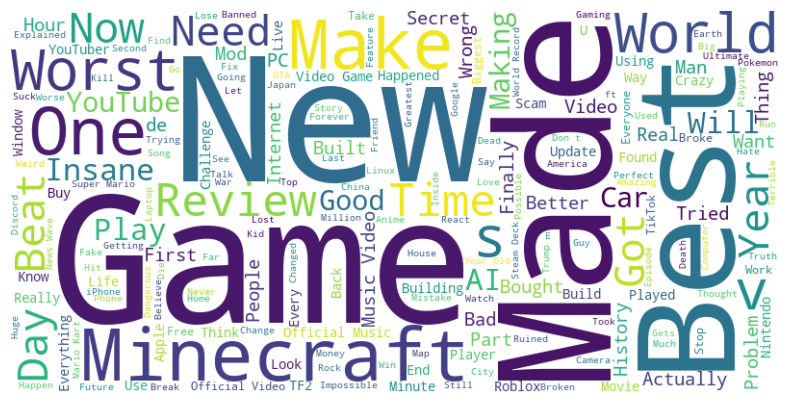

In [21]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
other_text = ' '.join(title_df['other_title'])

In [23]:
other_text_cloud = WordCloud(width=800, height=400, background_color='white').generate(other_text)


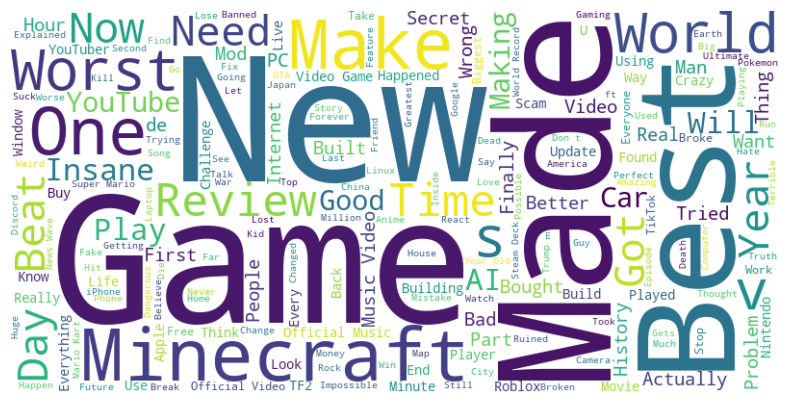

In [24]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [25]:
title_df.sample()

,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title
168109,znJ6mYB9Nss,Fallout: NV | E7 | lonesome road (DLC),0,3cad9521239e2f6ef2143df4d4e976702464e562623d10...,YouTube,ac966653703a531f84f5aef3257aa90c3dbe62d9db8648...,1716349934229,da304d0e-65b7-409e-bfdc-007fed6172b9,"Breaking Fallout New Vegas by Becoming Death, ..."


# ChatGPT Model

This is my attempt to use ChatGPT to classify the clickbait titles and see how it performs against other models. It is neccesary to set up a ChatGPT API key to perform this action. I will link to how to perform this action. 

In [41]:
test = title_df.sample()['title']

In [28]:
test

163795    A New HORRIFYING FNAF Fan Game Series is Begin...
Name: title, dtype: object

In [43]:
title_df.iloc[48248]

Unnamed: 0                                                                  80226
videoID                                                               vvzEQw1PUlY
other_title                   Driving cars from 1-cylinder to 16-cylinder engines
original                                                                        0
userID           077a585f32afc6a664b05f4566f398abc3f53e86b8a0c08bbac257c3f4b2feb4
service                                                                   YouTube
hashedVideoID    a26b178569d99e97d7e70cebd2c50794e0a6fb89440bcda122fe21df3c46b972
timeSubmitted                                                       1702332790740
UUID                                         abd761ee-d246-44cc-b949-a7c1bcea3b6c
title                                           1-Cylinder Car vs 16-Cylinder Car
Name: 48248, dtype: object

In [30]:
prompt = f"""Classify the text into one of the classes. Also return the probability of it being clickbait.
Classes: [`clickbait`, `not clickbait`]
Text: World's first screw-bike
Class: `not clickbait`

Text: Mastering mood in photography (3 easy steps).
Class: `not clickbait`

Text: What's Inside the DON'T DIE BOX???.
Class: `clickbait`

Text: 'OBNOXIOUS Idiot Pushes The WRONG JUDGE Too Far!!! Wild Court Cam...'
Class: 'clickbait'

Text: {test}
Class: """

In [31]:
prompt

"Classify the text into one of the classes. Also return the probability of it being clickbait.\nClasses: [`clickbait`, `not clickbait`]\nText: World's first screw-bike\nClass: `not clickbait`\n\nText: Mastering mood in photography (3 easy steps).\nClass: `not clickbait`\n\nText: What's Inside the DON'T DIE BOX???.\nClass: `clickbait`\n\nText: 'OBNOXIOUS Idiot Pushes The WRONG JUDGE Too Far!!! Wild Court Cam...'\nClass: 'clickbait'\n\nText: 163795    A New HORRIFYING FNAF Fan Game Series is Begin...\nName: title, dtype: object\nClass: "

In [32]:
# Generate completion using OpenAI's GPT-3.5 model
response = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-3.5-turbo",
)

# Extract the generated classification label and probability
output = response
print(response)

ChatCompletion(id='chatcmpl-9iqGZLIzWua3cKRtnaZWed48JylAN', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='`clickbait`', role='assistant', function_call=None, tool_calls=None))], created=1720474371, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=5, prompt_tokens=159, total_tokens=164))


## Youtube Transcriber

In [18]:
#single example
transcript = YouTubeTranscriptApi.get_transcript('8KUcjGb57CE')

In [19]:
#testing a small amount of video transcriptions
test_ids = ids[0:10]

In [20]:
#Getting 10 trancripts from the YouTubeTranscriptionAPI
transcripts = YouTubeTranscriptApi.get_transcripts(test_ids, languages=['en'],continue_after_error=True)

In [21]:
#It's a tupple with 
transcripts[0].keys()

dict_keys(['U0wTDK0VOeY', 'kdz6FeQLuHQ', 'jN7mSXMruEo', 'y6F6MolfV4Y', 'ETRpkp03stQ', 'jfOUVYQnuhw', 'Aw9M7dKV0oQ', 'qD6bPNZRRbQ', 'fSwpe8r50_o', 'd6tgmGqXysM'])

In [35]:
#The transcript is broken up by second
transcripts[0]['kdz6FeQLuHQ']

[{'text': 'I make videos about great cities around the world.\xa0',
  'start': 0.0,
  'duration': 2.7},
 {'text': 'But sometimes ignorant suburbanites tell me\xa0\nthat America is too big to have good cities.',
  'start': 2.7,
  'duration': 5.4},
 {'text': 'So the best urbanism in North America\xa0\nmust be the small countries, right?\xa0',
  'start': 8.1,
  'duration': 4.26},
 {'text': 'Let’s go to the map!', 'start': 13.08, 'duration': 1.26},
 {'text': 'Hrmm. Definitely not Canada. I know that for sure.',
  'start': 14.34,
  'duration': 3.3},
 {'text': 'Mexico maybe? No, still too big.', 'start': 17.64, 'duration': 3.0},
 {'text': 'Cuba? I dunno …\u2028\u2028Wait a second, what’s\xa0\nthis? The Bahamas? Yes! That’s it!\xa0',
  'start': 20.64,
  'duration': 6.72},
 {'text': 'Great urbanism, here I come!\xa0',
  'start': 28.02,
  'duration': 2.52},
 {'text': '[travel montage]\nAlright!\xa0 I’m ready to see the best\xa0\xa0',
  'start': 38.82,
  'duration': 14.94},
 {'text': 'designed c

In [22]:
#The text formatter will put the transcripts into plain text
formatter = TextFormatter()
#Iniatiating an empty list for the transcripts
transcript_txts = []

In [23]:
#Loop to download the transcripts
for i in test_ids:
    transcript_txts.append(formatter.format_transcript(transcripts[0][i]))
#creating a dictionary of the transcripts and their youtube video IDs
transcript_dict = dict(zip(test_ids, transcript_txts))

In [40]:
formatter.format_transcript(transcripts[0]['kdz6FeQLuHQ'])

In [50]:
transcript_dict['kdz6FeQLuHQ']

"I make videos about great cities around the world.\xa0\nBut sometimes ignorant suburbanites tell me\xa0\nthat America is too big to have good cities.\nSo the best urbanism in North America\xa0\nmust be the small countries, right?\xa0\nLet’s go to the map!\nHrmm. Definitely not Canada. I know that for sure.\nMexico maybe? No, still too big.\nCuba? I dunno …\u2028\u2028Wait a second, what’s\xa0\nthis? The Bahamas? Yes! That’s it!\xa0\nGreat urbanism, here I come!\xa0\n[travel montage]\nAlright!\xa0 I’m ready to see the best\xa0\xa0\ndesigned cities in North America.\n…\nDamn it.\n[NJB Intro]\xa0\nSo I took a trip to the Bahamas recently.\nA beautiful land of sun, sand, sea\xa0\nAnd swimming pigs\nAnd I met up with my\xa0\xa0\nfriend who runs the YouTube channel Foreign Man in\xa0\na Foreign Land, who is Bahamian and grew up there.\xa0\nFor the purpose of this video I’ll just refer\xa0\nto him as “Foreign” because you Internet weirdos\xa0\xa0\ndon’t need to know his real name.\nAlthough 

In [39]:
altered_titles[altered_titles['videoID']=='kdz6FeQLuHQ']

,Unnamed: 0,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title
1,1,kdz6FeQLuHQ,Bad urbanism in the Bahamas,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,1dbe829d42168bdea3da01c29015072a3d79863c4b6aebe7321a976fbb973e8a,1680047863899,2803aa64-0759-4a28-8bf8-52499c9102ad,This Tiny Island has Insane Traffic
76358,128966,kdz6FeQLuHQ,Bad urbanism in the Bahamas (Nassau),0,47097ea028d3fe8c8ef71a34f39add5589ef156408d599c8bab08614caaf4409,YouTube,1dbe829d42168bdea3da01c29015072a3d79863c4b6aebe7321a976fbb973e8a,1711241871048,4973a4cf-553d-46f4-8085-b4fb9ff8b32a,This Tiny Island has Insane Traffic


## ChatGPT Titling 

### Prompt for ChatGPT API

In [34]:
text = ""

In [27]:

prompt = f"""I will give you a transcript of a youtube video. I want you to give it a title
that is informative and summarizes the video. I want this to be the opposite of clickbait. A lot of
titles are too clickbaity. We want them to be clear.`



Transcript: {text}
 """

In [37]:
prompt+text

"I will give you a transcript of a youtube video. I want you to give it a title\nthat is informative and summarizes the video. I want this to be the opposite of clickbait. A lot of\ntitles are too clickbaity. We want them to be clear.`\n\n\n\nTranscript: \n I make videos about great cities around the world.\xa0\nBut sometimes ignorant suburbanites tell me\xa0\nthat America is too big to have good cities.\nSo the best urbanism in North America\xa0\nmust be the small countries, right?\xa0\nLet’s go to the map!\nHrmm. Definitely not Canada. I know that for sure.\nMexico maybe? No, still too big.\nCuba? I dunno …\u2028\u2028Wait a second, what’s\xa0\nthis? The Bahamas? Yes! That’s it!\xa0\nGreat urbanism, here I come!\xa0\n[travel montage]\nAlright!\xa0 I’m ready to see the best\xa0\xa0\ndesigned cities in North America.\n…\nDamn it.\n[NJB Intro]\xa0\nSo I took a trip to the Bahamas recently.\nA beautiful land of sun, sand, sea\xa0\nAnd swimming pigs\nAnd I met up with my\xa0\xa0\nfriend w

In [36]:
text = transcript_dict['kdz6FeQLuHQ']

In [29]:
# Generate completion using OpenAI's GPT-3.5 model
response = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-3.5-turbo",
)

# Extract the generated classification label and probability
output = response
print(response)

ChatCompletion(id='chatcmpl-9l69xSKEuh2t31AbMxWkn12cQoYAp', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='How to properly train your dog with positive reinforcement techniques\n\nTitle: Effective Dog Training Tips: Positive Reinforcement Methods Explained', role='assistant', function_call=None, tool_calls=None))], created=1721012121, model='gpt-3.5-turbo-0125', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=24, prompt_tokens=71, total_tokens=95))


In [64]:
test_ids

['U0wTDK0VOeY',
 'kdz6FeQLuHQ',
 'jN7mSXMruEo',
 'y6F6MolfV4Y',
 'ETRpkp03stQ',
 'jfOUVYQnuhw',
 'Aw9M7dKV0oQ',
 'qD6bPNZRRbQ',
 'fSwpe8r50_o',
 'd6tgmGqXysM']

In [73]:
for i in test_ids:
    text = transcript_dict[i]
    print(i)
    print (text[0:100])
    print(prompt[200:300])

U0wTDK0VOeY
Antarctica is Earth's coolest continent,
and most complicatedly claimed continent.
Yet sadly has no 
aity. We want them to be clear.`



Transcript: I make videos about great cities around the world. 

kdz6FeQLuHQ
I make videos about great cities around the world. 
But sometimes ignorant suburbanites tell me 
tha
aity. We want them to be clear.`



Transcript: I make videos about great cities around the world. 

jN7mSXMruEo
I make videos about how walkable cities
are more efficient more environmentally
friendly more financ
aity. We want them to be clear.`



Transcript: I make videos about great cities around the world. 

y6F6MolfV4Y
this month has been absolutely
ridiculous and I thought since I don't
have the time to make a couple
aity. We want them to be clear.`



Transcript: I make videos about great cities around the world. 

ETRpkp03stQ
Here I have a hoop it's actually a bike tyre but 
you get the idea and we've taped some very heavy  
aity. We want them to be clear.

In [40]:
output = []

In [94]:
for i in test_ids:
    print(i)

U0wTDK0VOeY
kdz6FeQLuHQ
jN7mSXMruEo
y6F6MolfV4Y
ETRpkp03stQ
jfOUVYQnuhw
Aw9M7dKV0oQ
qD6bPNZRRbQ
fSwpe8r50_o
d6tgmGqXysM


In [101]:
output_dict = {}

In [127]:
for i in test_ids:
    print(i)
    text = transcript_dict[i]
    response = openai.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt+text,
        }
    ],
    model="gpt-3.5-turbo",
    )

# Extract the generated classification label and probability
    output.append(response)
    output_dict[i]=response

U0wTDK0VOeY
kdz6FeQLuHQ
jN7mSXMruEo
y6F6MolfV4Y
ETRpkp03stQ
jfOUVYQnuhw
Aw9M7dKV0oQ
qD6bPNZRRbQ
fSwpe8r50_o
d6tgmGqXysM


In [128]:
len(output)

10

42

In [129]:
gpt_titles = [output[i].choices[0].message.content for i in range(len(output))]

In [130]:
gpt_dict = dict(zip(test_ids,gpt_titles))

In [131]:
gpt_dict

{'U0wTDK0VOeY': '"The Tale of Antarctica\'s Flag: From a Digital Debut to a 3D Effect"',
 'kdz6FeQLuHQ': 'Exploring Transit Challenges in the Bahamas: A Case Study in Car-Centric Urban Design',
 'jN7mSXMruEo': "The Truth About SUVs: Why They're Bad for Cities and What Can Be Done",
 'y6F6MolfV4Y': "In-Depth Office Tour of a Tech YouTuber's Workspace",
 'ETRpkp03stQ': 'Understanding the Physics of Hopping Hoops: A Comprehensive Analysis and Experimentations',
 'jfOUVYQnuhw': 'The Complexity and Coordination of Airport Codes: A Detailed Look Into the Alphabet Soup of Air Travel',
 'Aw9M7dKV0oQ': '"Don\'t Die Box Unboxing: Essential Travel Gear for Dangerous Adventures"',
 'qD6bPNZRRbQ': '"The Unseen Logistics of Runway Numbering Based on the Earth\'s Magnetic Field & Geographic North"',
 'fSwpe8r50_o': 'The Theme System Journal: A Practical Guide to Improving Your Life',
 'd6tgmGqXysM': 'Testing Full Self-Driving Beta Software on the Deadliest Road in America'}

In [98]:
for i in range(len(output)):
    print(output[i].choices[0].message.content)

"The Evolution of Antarctica's Unofficial Flag: A Story of Design and Copyright"
The Evolution of Antarctica's Flag: From Unofficial Beginnings to 3D Perfection
Exploring Urbanism in the Bahamas: A Case Study in Inequalities and Transportation Challenges
The Dangers of SUVs and Light Trucks: An Informative Look at the Negative Impact on Cities and Safety
Home Office Tour and Setup - A Detailed Look at a Productive Workspace
Investigating the Physics of Hopping Hoops: A Detailed Analysis with Mathematical Insights and Experimental Results
The World of Airport Codes: An Informative Overview
"Exploring the Don't Die Box: Essential Travel Gear for Dangerous Adventures"
Understanding the System Behind Runway Numbers and the Global Aviation Dilemma
"How to Use the Theme System Journal for Daily Improvement and Goal Setting"
Tesla's Beta Full Self-Driving Software Test on The Deadliest Road in America


In [73]:
output[9].choices[0].message.content

'"How to Use the Theme System Journal for Daily Improvement and Goal Setting"'

In [ ]:
for i in output.choices[0].mes

In [157]:
test_titles = altered_titles[0:10]

In [160]:
test_titles.reset_index(inplace=True)

In [144]:
gpt_title_frame = pd.DataFrame.from_dict(gpt_dict,orient='index',columns=['GPTtitle'])

In [146]:
gpt_title_frame.reset_index(inplace=True)

In [153]:
gpt_title_frame.rename(columns={"index":"videoID"},inplace=True)

In [154]:
gpt_title_frame

,videoID,GPTtitle
0,U0wTDK0VOeY,"""The Tale of Antarctica's Flag: From a Digital Debut to a 3D Effect"""
1,kdz6FeQLuHQ,Exploring Transit Challenges in the Bahamas: A Case Study in Car-Centric Urban Design
2,jN7mSXMruEo,The Truth About SUVs: Why They're Bad for Cities and What Can Be Done
3,y6F6MolfV4Y,In-Depth Office Tour of a Tech YouTuber's Workspace
4,ETRpkp03stQ,Understanding the Physics of Hopping Hoops: A Comprehensive Analysis and Experimentations
5,jfOUVYQnuhw,The Complexity and Coordination of Airport Codes: A Detailed Look Into the Alphabet Soup of Air Travel
6,Aw9M7dKV0oQ,"""Don't Die Box Unboxing: Essential Travel Gear for Dangerous Adventures"""
7,qD6bPNZRRbQ,"""The Unseen Logistics of Runway Numbering Based on the Earth's Magnetic Field & Geographic North"""
8,fSwpe8r50_o,The Theme System Journal: A Practical Guide to Improving Your Life
9,d6tgmGqXysM,Testing Full Self-Driving Beta Software on the Deadliest Road in America


In [161]:
pd.merge(test_titles,gpt_title_frame)

,index,Unnamed: 0,videoID,other_title,original,userID,service,hashedVideoID,timeSubmitted,UUID,title,GPTtitle
0,0,0,U0wTDK0VOeY,History of Antarctica's Flag,0,1ff2cdd11ed952d0c13d678413113860ff279a3d90d31c5435508de0375721e9,YouTube,93646c719490256e8cb43cfaa41e39534525389b0b28f5d8f28ca937f1abcf9d,1680044079895,07f32a99-3e2d-48a3-a247-b2b03f7cd4bc,The Coolest ''''Country'''' Flag You Need To Know,"""The Tale of Antarctica's Flag: From a Digital Debut to a 3D Effect"""
1,1,1,kdz6FeQLuHQ,Bad urbanism in the Bahamas,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,1dbe829d42168bdea3da01c29015072a3d79863c4b6aebe7321a976fbb973e8a,1680047863899,2803aa64-0759-4a28-8bf8-52499c9102ad,This Tiny Island has Insane Traffic,Exploring Transit Challenges in the Bahamas: A Case Study in Car-Centric Urban Design
2,2,2,jN7mSXMruEo,"The Problems With Trucks and SUVs in Cities, and How It Got This Way",0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,b4ecd2e771e2e39068938450ee22decbf77b35fae52f2a0892d2f52f6999cc41,1680047982458,96e6b40c-c858-4d80-af30-ce5e0584f40c,These Stupid Trucks are Literally Killing Us,The Truth About SUVs: Why They're Bad for Cities and What Can Be Done
3,4,4,y6F6MolfV4Y,YouTube Studio / Office Tour (early 2023),0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,2220d4d60dcecd13e0afc07fc67cc29e27e8ed6790c9b5384949c07f4733549e,1680053177069,41358c60-8006-41c0-8cde-c11a2e222fe4,YouTube Studio / Office Tour! (early 2023),In-Depth Office Tour of a Tech YouTuber's Workspace
4,7,7,ETRpkp03stQ,Attempting to determine how a rolling unbalanced wheel behaves,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,f28025b070e9e7c1b237c4e2296e52e7fda26e4ec1623ea4dd8aacc96b6a0f81,1680053812750,ef3917da-5754-4b0f-8a90-aea567748ec3,The 56-Year Argument About a Hopping Hoop,Understanding the Physics of Hopping Hoops: A Comprehensive Analysis and Experimentations
5,8,8,jfOUVYQnuhw,Airport Codes,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,1347c44c69deebbdacd399006dbf6a15da754a74082ed0047f04529b2fc5609d,1680053983239,cdc85966-81ad-4230-b8c1-551badad8a03,✈️ The Maddening Mess of Airport Codes! ✈️,The Complexity and Coordination of Airport Codes: A Detailed Look Into the Alphabet Soup of Air Travel
6,9,9,Aw9M7dKV0oQ,"Unboxing My Personal ""Don't Die"" Box",0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,4b7ef0a0e7ce80ae558ef93cd19067aea173dae0eb10660c4a035f54683c8bea,1680054040215,26a2b965-0f16-4be9-8259-ee4cc2be5e0d,What's Inside the DON'T DIE BOX???,"""Don't Die Box Unboxing: Essential Travel Gear for Dangerous Adventures"""
7,10,10,qD6bPNZRRbQ,Runway Digits,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,62dc17181edff169a697c655d39605e6778e38e3f8e4f5b42c22f27867932cd7,1680054100773,4cfce3f6-62b1-43e8-addf-e81ab8f436e7,The Simple Secret of Runway Digits,"""The Unseen Logistics of Runway Numbering Based on the Earth's Magnetic Field & Geographic North"""
8,11,12,fSwpe8r50_o,My Theme Journal,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,106813f8fff379f791157fd97da4cf5f662a8569b2d774e8a269566d5e511953,1680054175689,6db28775-d412-4dab-9875-4b344d25fc96,This Journal Keeps Me Productive (and Maybe You Too),The Theme System Journal: A Practical Guide to Improving Your Life
9,12,13,d6tgmGqXysM,Testing a Tesla on a Curvy Mountain Road,0,7b89ea26f77bda8176e655eee86029f28c1e6514b6d6e3450bce362b5b126ca3,YouTube,3d1aeaa5edaf85df0e311987fed390ccfe098bd726d70b4bb86946de7ebdd023,1680054310991,f6d4885c-e66f-44a0-b8a5-8720d62dde1a,Tesla Self-Driving Beta VS Deadliest Road in America,Testing Full Self-Driving Beta Software on the Deadliest Road in America
